<a href="https://colab.research.google.com/github/Bmartins25/Regressao_Linear_Gradiente_Descen/blob/main/Modelo_de_regress%C3%A3o_linear_usando_gradiente_descendente_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curso: Coursera
Aluno: Bruno Martins Bartolomeu

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *  # Certifique-se de ter esse arquivo com funções auxiliares
import copy
import math


In [29]:
# Função para carregar os dados
def load_data():
    # Simulando um conjunto de dados de exemplo
    x_train = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])
    y_train = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233])
    return x_train, y_train

In [30]:

# Função para calcular o custo J(w, b)
def compute_cost(x, y, w, b):
    """
    Calcula a função de custo para regressão linear.
    """
    m = x.shape[0]  # Número de exemplos de treinamento
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b  # Predição do modelo
        cost = (f_wb - y[i]) ** 2  # Erro ao quadrado
        cost_sum += cost

    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost



In [31]:
# Função para calcular os gradientes
def compute_gradient(x, y, w, b):
    """
    Calcula os gradientes para os parâmetros w e b.
    """
    m = x.shape[0]  # Número de exemplos
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b  # Predição
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db



In [32]:
# Algoritmo de Gradiente Descendente
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    """
    Executa o gradiente descendente para aprender os parâmetros.
    """
    m = len(x)
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:  # Evita uso excessivo de recursos
            cost = compute_cost(x, y, w, b)
            J_history.append(cost)

        if i % (num_iters // 10) == 0:
            print(f"Iteração {i}: Custo {J_history[-1]:.2f}")

    return w, b, J_history



In [33]:
# Carregar os dados
x_train, y_train = load_data()



In [34]:
# Configuração inicial
theta_w = 0.
theta_b = 0.
alpha = 0.01  # Taxa de aprendizado
iterations = 1500  # Número de iterações




In [35]:
# Executando o Gradiente Descendente
w_final, b_final, _ = gradient_descent(x_train, y_train, theta_w, theta_b, alpha, iterations)
print(f"Parâmetros finais: w = {w_final:.6f}, b = {b_final:.6f}")



Iteração 0: Custo 26.87
Iteração 150: Custo 6.09
Iteração 300: Custo 6.08
Iteração 450: Custo 6.07
Iteração 600: Custo 6.07
Iteração 750: Custo 6.06
Iteração 900: Custo 6.05
Iteração 1050: Custo 6.05
Iteração 1200: Custo 6.04
Iteração 1350: Custo 6.04
Parâmetros finais: w = 1.587859, b = 1.270673


In [36]:
# Previsões para populações específicas
pop1 = 3.5
pop2 = 7.0
predict1 = pop1 * w_final + b_final
predict2 = pop2 * w_final + b_final
print(f"Previsão para população de 35.000: ${predict1 * 10000:.2f}")
print(f"Previsão para população de 70.000: ${predict2 * 10000:.2f}")



Previsão para população de 35.000: $68281.80
Previsão para população de 70.000: $123856.87


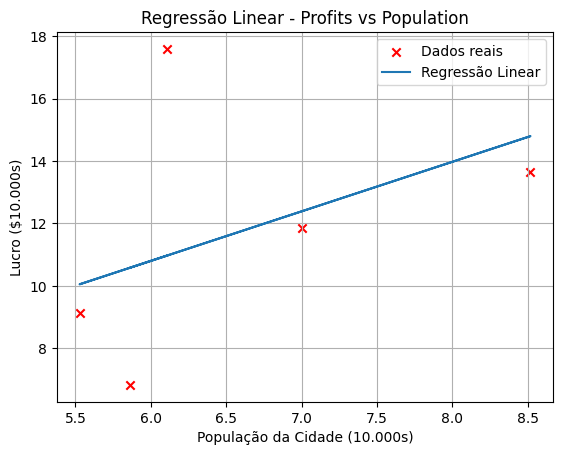

In [41]:
# Plotando os resultados
plt.scatter(x_train, y_train, marker='x', c='r', label="Dados reais")
plt.plot(x_train, w_final * x_train + b_final, label="Regressão Linear")
plt.xlabel("População da Cidade (10.000s)")
plt.ylabel("Lucro ($10.000s)")
plt.title("Regressão Linear - Profits vs Population")
plt.legend()
plt.grid(True)
plt.show()